<a href="https://colab.research.google.com/github/Krishnapabbu17/diamonds-analysis/blob/main/DataScienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import kagglehub

Reading in Data

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("diamonds.csv")
df.head()
# View first few rows
df.head()


Saving diamonds.csv to diamonds.csv


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Github

Checking for missing/duplicate values

In [ ]:
# Check how many missing values per column
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

# To see if there are *any* missing values anywhere
print("\nAny missing values in dataset?:", df.isnull().values.any())


Missing values per column:
 Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Any missing values in dataset?: False


In [ ]:
# Number of duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

# Optionally, show duplicate rows if any
if num_duplicates > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated()])


Number of duplicate rows: 0


In [ ]:
# Find rows where any dimension is zero
df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]

# Step 1: Drop unnecessary column
df = df.drop(columns=['Unnamed: 0'])

# Step 2: Remove rows where any dimension is 0 (invalid)
original_shape = df.shape
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]
cleaned_shape = df.shape

# Step 3: Show how many rows were removed
print(f"Original rows: {original_shape[0]}")
print(f"Cleaned rows: {cleaned_shape[0]}")
print(f"Removed rows: {original_shape[0] - cleaned_shape[0]}")

Original rows: 53940
Cleaned rows: 53920
Removed rows: 20


In [ ]:
print("Cut values:\n", df['cut'].value_counts())
print("\nColor values:\n", df['color'].value_counts())
print("\nClarity values:\n", df['clarity'].value_counts())


Cut values:
 cut
Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: count, dtype: int64

Color values:
 color
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: count, dtype: int64

Clarity values:
 clarity
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: count, dtype: int64


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#Reorder categorical columns
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
df['cut'] = pd.Categorical(df['cut'], categories=cut_order, ordered=True)

clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
df['clarity'] = pd.Categorical(df['clarity'], categories=clarity_order, ordered=True)

color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']  # D is best, J is worst
df['color'] = pd.Categorical(df['color'], categories=color_order, ordered=True)


In [ ]:
df[['x', 'y', 'z']].min()


,0
x,3.73
y,3.68
z,1.07


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#Outliers(too high)
df[df['y'] > 30]
df[df['z'] > 20]

#simple fix
df = df[df['z'] < 10]


In [ ]:
#Outliers(too high)
df[df['x'] > 10]
df[df['y'] > 10]

#Simple fix
df = df[(df['x'] < 30) & (df['y'] < 30) & (df['z'] < 30)]


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#Renaming columns
#df = df.rename(columns={
 #   'carat': 'carat_weight',
  #  'cut': 'cut_quality',
   # 'color': 'color_grade',
    #'clarity': 'clarity_grade',
    #'depth': 'depth_percent',
    #'table': 'table_percent',
    #'price': 'price_usd',
    #'x': 'length_mm',
    #'y': 'width_mm',
    #'z': 'depth_mm'
#})


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df['cut'].unique()
df['cut_quality'] = df['cut'].apply(lambda x: 'High' if x in ['Ideal', 'Premium', 'Very Good'] else 'Low')
df['cut_quality'].value_counts()
df = df.drop(columns=['cut'])
df = df.rename(columns={
    'carat': 'carat_weight',
    'color': 'color_grade',
    'clarity': 'clarity_grade',
    'depth': 'depth_percent',
    'table': 'table_percent',
    'price': 'price_usd',
    'x': 'length_mm',
    'y': 'width_mm',
    'z': 'depth_mm'
})


/tmp/ipython-input-3794611110.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


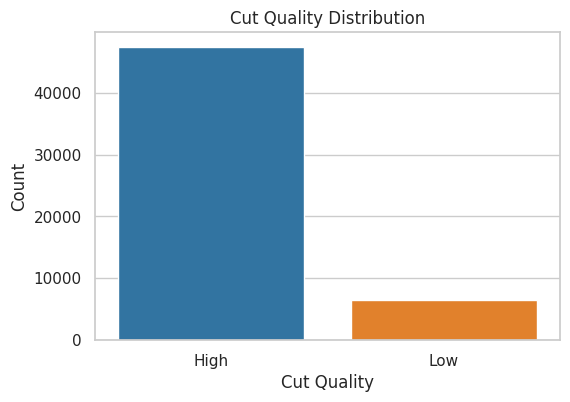

In [ ]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme
sns.set(style="whitegrid")

# Fixed color palette
custom_palette = {'High': '#1f77b4', 'Low': '#ff7f0e'}

# Class Distribution of Target with consistent color
plt.figure(figsize=(6, 4))
sns.countplot(
    x='cut_quality',
    data=df,
    order=['High', 'Low'],  # Ensure order matches palette
    palette=custom_palette
)
plt.title('Cut Quality Distribution')
plt.ylabel('Count')
plt.xlabel('Cut Quality')
plt.show()


/tmp/ipython-input-1661296867.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


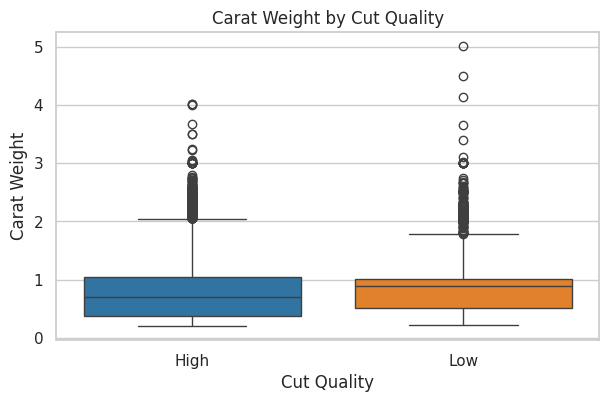

/tmp/ipython-input-1661296867.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


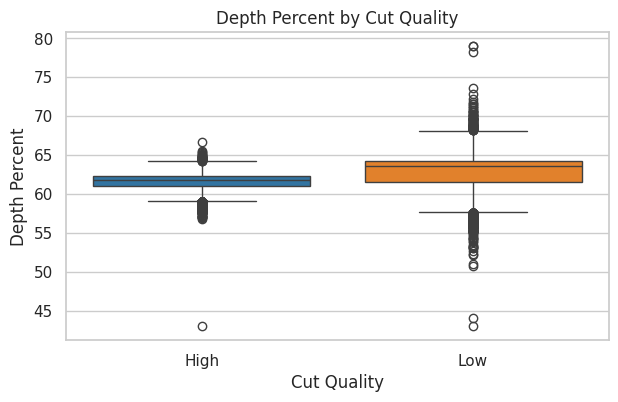

/tmp/ipython-input-1661296867.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


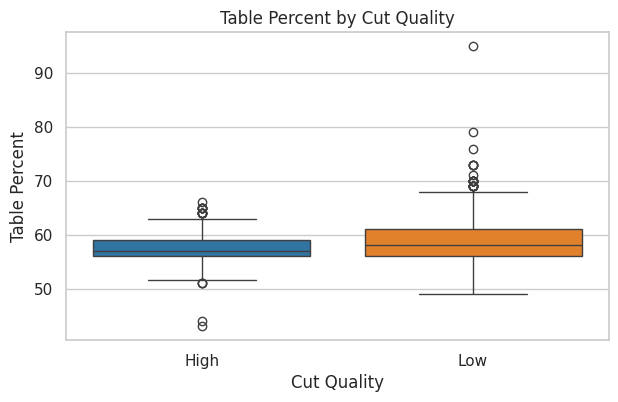

In [ ]:
# Fixed color palette for consistent cut quality coloring


# Boxplots of Numeric Features by Cut Quality with Consistent Color
numeric_features = ['carat_weight', 'depth_percent', 'table_percent']

for feature in numeric_features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(
        x='cut_quality',
        y=feature,
        data=df,
        palette=custom_palette
    )
    plt.title(f'{feature.replace("_", " ").title()} by Cut Quality')
    plt.xlabel('Cut Quality')
    plt.ylabel(feature.replace('_', ' ').title())
    plt.show()


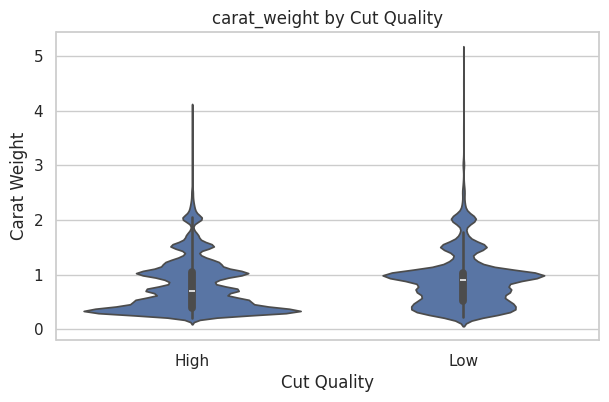

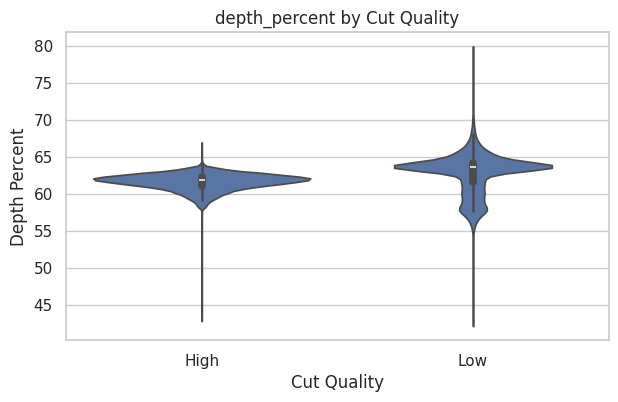

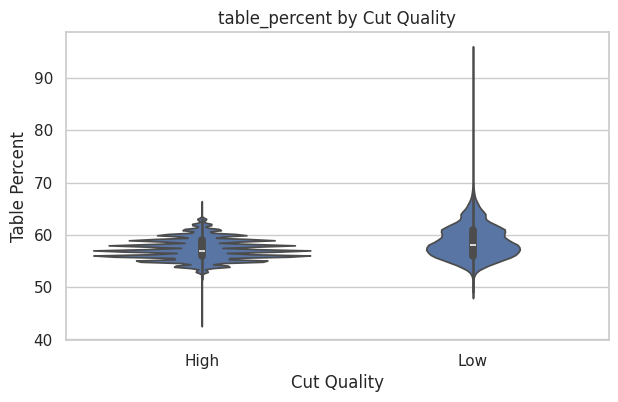

In [ ]:
# Violin Plots (optional alternative to boxplots)
for feature in numeric_features:
    plt.figure(figsize=(7, 4))
    sns.violinplot(x='cut_quality', y=feature, data=df)
    plt.title(f'{feature} by Cut Quality')
    plt.xlabel('Cut Quality')
    plt.ylabel(feature.replace('_', ' ').title())
    plt.show()


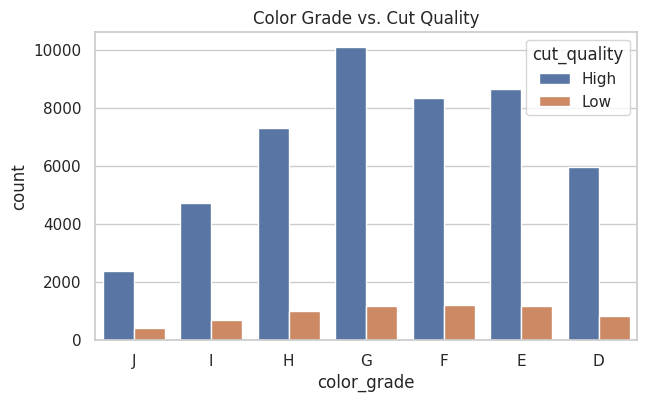

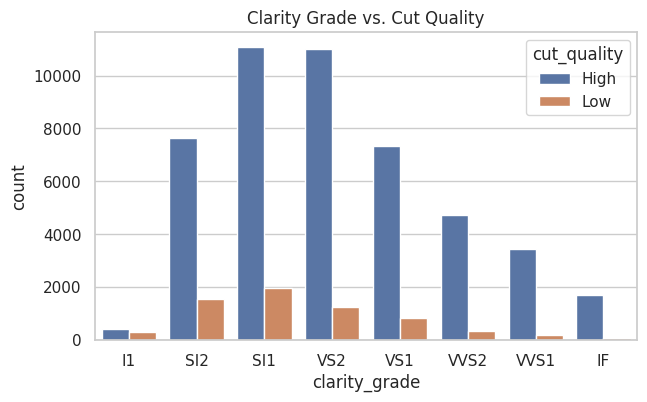

In [ ]:
#  Categorical Feature vs. Target (Color and Clarity)
plt.figure(figsize=(7, 4))
sns.countplot(x='color_grade', hue='cut_quality', data=df)
plt.title('Color Grade vs. Cut Quality')
plt.show()

plt.figure(figsize=(7, 4))
sns.countplot(x='clarity_grade', hue='cut_quality', data=df)
plt.title('Clarity Grade vs. Cut Quality')
plt.show()


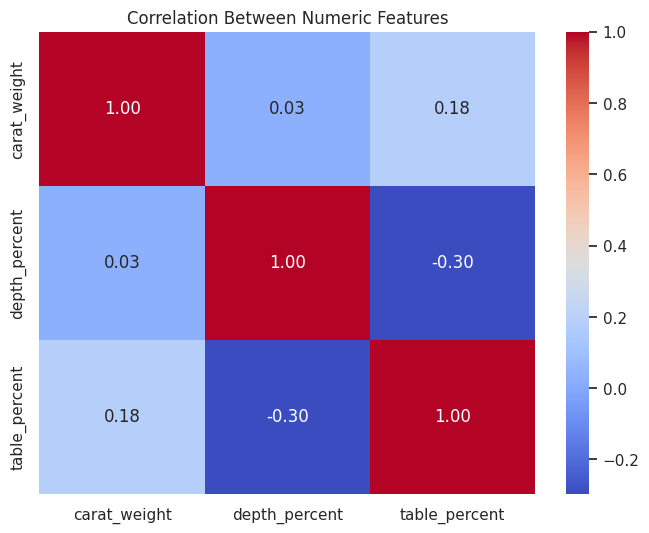

In [ ]:
# Correlation Heatmap of Numeric Features

plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Features')
plt.show()


In [ ]:
from scipy.stats import ttest_ind

high = df[df['cut_quality'] == 'High']
low = df[df['cut_quality'] == 'Low']

for feature in ['carat_weight', 'depth_percent', 'table_percent','price_usd','length_mm','width_mm','depth_mm']:
    tstat, pval = ttest_ind(high[feature], low[feature])
    print(f"{feature}: t = {tstat:.2f}, p = {pval:.4f}")



carat_weight: t = -18.18, p = 0.0000
depth_percent: t = -64.23, p = 0.0000
table_percent: t = -52.30, p = 0.0000
price_usd: t = -2.20, p = 0.0277
length_mm: t = -16.19, p = 0.0000
width_mm: t = -15.63, p = 0.0000
depth_mm: t = -23.48, p = 0.0000


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

for cat_feature in ['color_grade', 'clarity_grade']:
    contingency = pd.crosstab(df[cat_feature], df['cut_quality'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"{cat_feature}: chi2 = {chi2:.2f}, p = {p:.4f}")


color_grade: chi2 = 60.87, p = 0.0000
clarity_grade: chi2 = 1342.78, p = 0.0000


In [ ]:
# Random Forest with color_grade added and manual class weights
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Prepare features and target
X = df[['carat_weight', 'depth_percent', 'table_percent', 'clarity_grade','color_grade']]
y = df['cut_quality']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocess categorical features (clarity_grade, color_grade)
categorical_features = ['clarity_grade', 'color_grade']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # keep numerical columns as is
)

# Define manual class weights (tweak these values)
class_weights = {
    'High': 1,    # weight for majority class
    'Low':  5,     # higher weight for minority class to handle imbalance
}

# Pipeline with preprocessor and RandomForestClassifier with manual class weights
rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight=class_weights,  # <-- here is the manual weight
        random_state=42
    ))
])

# Train model
rf_clf.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))


Accuracy: 0.9345326409495549

Classification Report:
               precision    recall  f1-score   support

        High       0.97      0.95      0.96      9482
         Low       0.70      0.81      0.75      1302

    accuracy                           0.93     10784
   macro avg       0.84      0.88      0.86     10784
weighted avg       0.94      0.93      0.94     10784


Confusion Matrix:
 [[9028  454]
 [ 252 1050]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Features and target
X = df[['carat_weight', 'depth_percent', 'table_percent', 'clarity_grade', 'color_grade']]
y = df['cut_quality']

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Preprocessing
categorical_features = ['clarity_grade', 'color_grade']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features)],
    remainder='passthrough'
)

# Base pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

# Define hyperparameter grid
param_distributions = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 6, 8],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__scale_pos_weight': [3, 3, 5, 10]  # helpful for imbalanced datasets
}

# Randomized search
random_search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_distributions,
    n_iter=30,  # number of combinations to try
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit
random_search.fit(X_train, y_train)

# Predict
best_model = random_search.best_estimator_
xgb_pred = best_model.predict(X_test)

# Evaluation
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(xgb_pred)

print("Best Parameters:\n", random_search.best_params_)
print("\nAccuracy:", accuracy_score(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_labels))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_labels))

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:16:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters:
 {'classifier__subsample': 1.0, 'classifier__scale_pos_weight': 3, 'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.01, 'classifier__colsample_bytree': 1.0}

Accuracy: 0.9506676557863502

Classification Report:
               precision    recall  f1-score   support

        High       0.97      0.98      0.97      9482
         Low       0.83      0.75      0.79      1302

    accuracy                           0.95     10784
   macro avg       0.90      0.86      0.88     10784
weighted avg       0.95      0.95      0.95     10784


Confusion Matrix:
 [[9279  203]
 [ 329  973]]


Results Plots


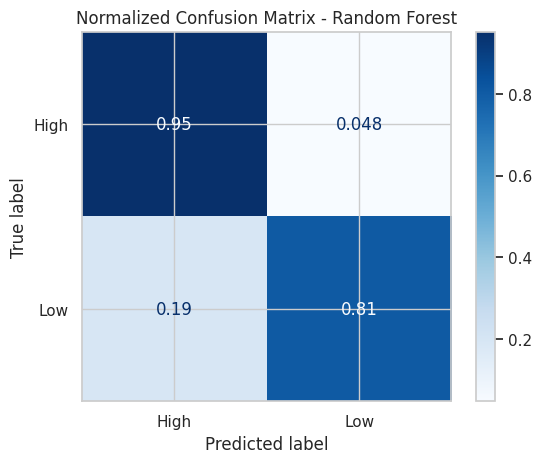

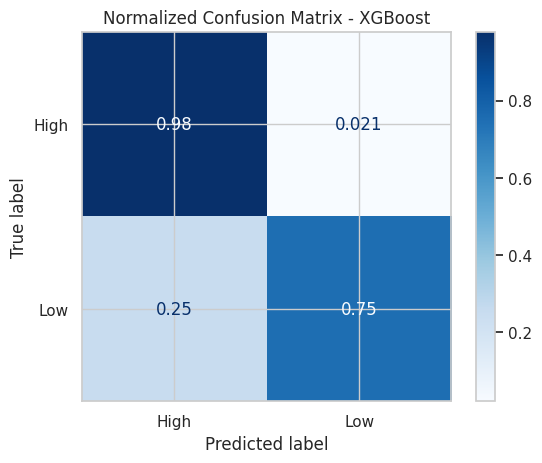

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=['High', 'Low'], normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['High', 'Low'])
    disp.plot(cmap='Blues')
    plt.title(f'Normalized Confusion Matrix - {model_name}')
    plt.show()

y_test_labels = label_encoder.inverse_transform(y_test)
xgb_pred_labels = label_encoder.inverse_transform(xgb_pred)


rf_pred_labels = rf_pred

plot_conf_matrix(y_test_labels, rf_pred_labels, 'Random Forest')
plot_conf_matrix(y_test_labels, xgb_pred_labels, 'XGBoost')

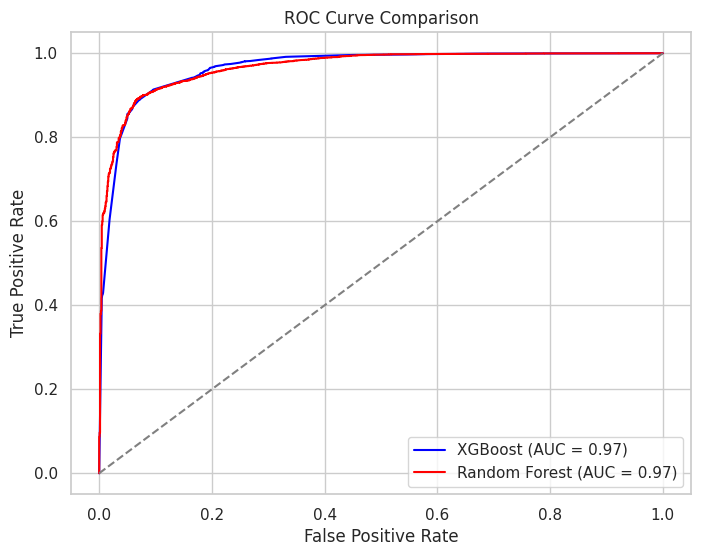

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_test_bin = y_test

# Probabilities for class 'High' (which is label 0)
xgb_probs_high = 1 - best_model.predict_proba(X_test)[:, 1]  # flip probabilities
rf_probs_high = 1 - rf_clf.predict_proba(X_test)[:, 1]

# Then compute ROC curve with these
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs_high, pos_label=0)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs_high, pos_label=0)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

print(np.unique(y_test))


[0 1]


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(label_encoder.classes_)

#so high is 0, low is 1


['High' 'Low']
